In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r"C:\Users\hemag\Downloads\retail_sales_dataset.csv")

In [3]:
df

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100
...,...,...,...,...,...,...,...,...,...
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [5]:
df.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


In [6]:
df.drop("Date",axis=1,inplace=True)

In [7]:
df

,Transaction ID,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,CUST001,Male,34,Beauty,3,50,150
1,2,CUST002,Female,26,Clothing,2,500,1000
2,3,CUST003,Male,50,Electronics,1,30,30
3,4,CUST004,Male,37,Clothing,1,500,500
4,5,CUST005,Male,30,Beauty,2,50,100
...,...,...,...,...,...,...,...,...
995,996,CUST996,Male,62,Clothing,1,50,50
996,997,CUST997,Male,52,Beauty,3,30,90
997,998,CUST998,Female,23,Beauty,4,25,100
998,999,CUST999,Female,36,Electronics,3,50,150


In [8]:
df.isnull().sum()

Transaction ID      0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

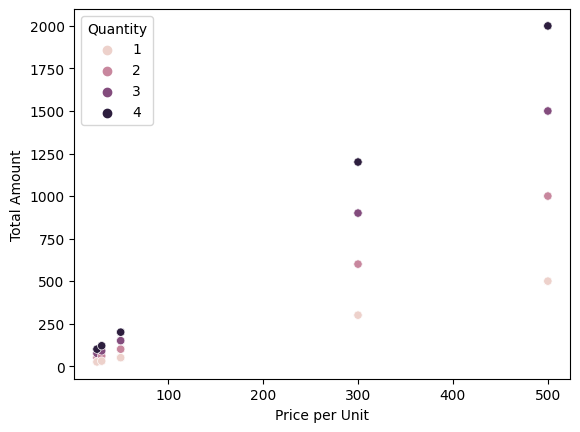

In [9]:
sns.scatterplot(x="Price per Unit",y="Total Amount",data=df,hue="Quantity")
plt.show()

In [10]:
df["Product Category"].value_counts()

Product Category
Clothing       351
Electronics    342
Beauty         307
Name: count, dtype: int64

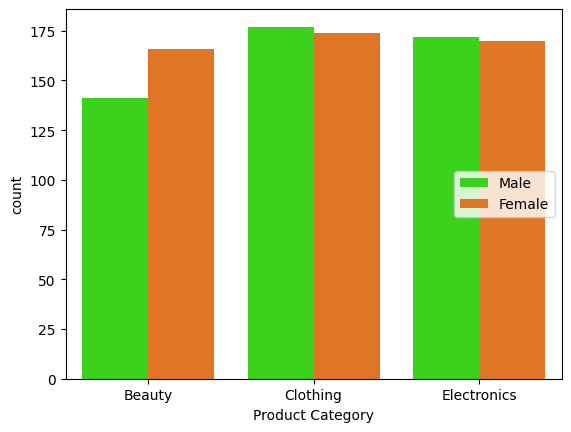

In [11]:
sns.countplot(x="Product Category",data=df,hue="Gender",palette="gist_ncar")
plt.legend(loc=5)
plt.show()

In [16]:
age=df["Age"].value_counts().sort_index()

In [60]:
age

Age
18    21
19    21
20    21
21    20
22    27
23    24
24    15
25    20
26    22
27    23
28    21
29    16
30    22
31    22
32    19
33    10
34    28
35    22
36    15
37    16
38    19
39    18
40    24
41    21
42    26
43    31
44    15
45    17
46    25
47    26
48    18
49    19
50    23
51    30
52    22
53    17
54    28
55    21
56    19
57    30
58    14
59    17
60    22
61    18
62    27
63    17
64    31
Name: count, dtype: int64

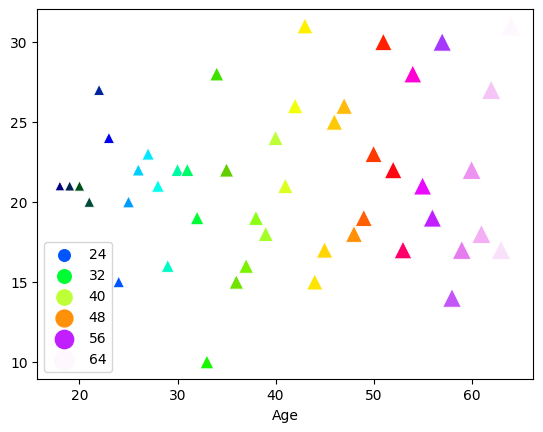

In [65]:
sns.scatterplot(x=age.index,y=age.values,marker="^",size=age.index,hue=age.index,sizes=(50,200),palette='gist_ncar')
plt.legend(loc=3)
plt.show()

In [66]:
df["Total Amount"].value_counts()

Total Amount
50      115
100     108
900      62
200      62
1200     54
30       51
500      51
25       51
1500     50
1000     49
2000     49
300      46
60       45
90       44
120      43
75       43
150      42
600      35
Name: count, dtype: int64

In [71]:
cross=pd.crosstab(index=df["Gender"],columns=df["Total Amount"])

In [72]:
cross

Total Amount,25,30,50,60,75,90,100,120,150,200,300,500,600,900,1000,1200,1500,2000
Gender,,,,,,,,,,,,,,,,,,
Female,27,24,56,22,25,24,52,22,21,32,26,24,17,34,28,29,23,24
Male,24,27,59,23,18,20,56,21,21,30,20,27,18,28,21,25,27,25


In [87]:
cross.max()

Total Amount
25      27
30      27
50      59
60      23
75      25
90      24
100     56
120     22
150     21
200     32
300     26
500     27
600     18
900     34
1000    28
1200    29
1500    27
2000    25
dtype: int64

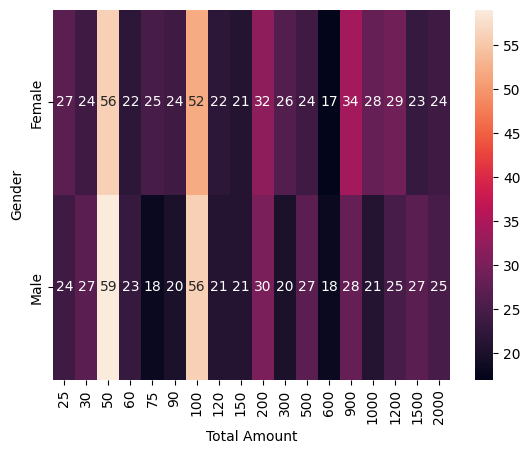

In [90]:
sns.heatmap(cross,annot=True)
plt.show()

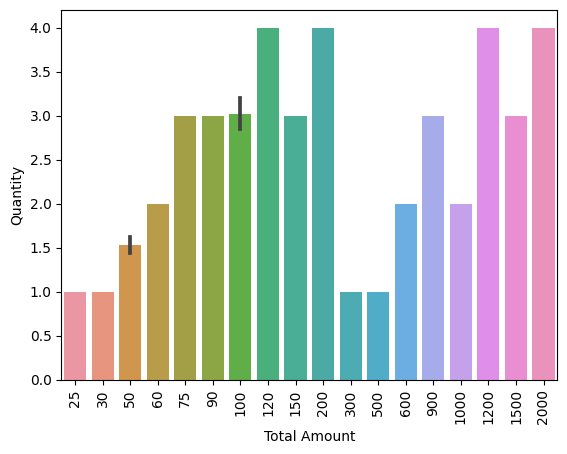

In [92]:
sns.barplot(x="Total Amount",y="Quantity",data=df)
plt.xticks(rotation=90)
plt.show()